In [1]:
%matplotlib inline

In [2]:
### Imports:
import sympy
import math
import cmath
import numpy as np
import numpy.polynomial.polynomial as p
import matplotlib.pyplot as plt
from turtle import *
import re
from sympy.ntheory import discrete_log
from matplotlib.transforms import Affine2D
import skimage.io
import time

In [3]:
### Other imports:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# import plotly.express as px

# Cars, Features and MSRP
---
---
---

<img src="./images/Mercedes-Benz W123 blueprints 1.jpg" width="1080"/>

<div style="text-align: center">Image created from the images, referenced below.</div>

[[Reference]](#Pinterest---300TD-wheel-base?---1)

[[Reference]](#Pinterest---300TD-wheel-base?---2)

---

## Introduction

***Author:*** Atanas Kuzmanov

***Date:*** 2021-October-12

*This is an article developed as a scientific notebook for an exam project assignment for a Machine Learning course from an Artificial Intelligence module.*

*One of the aims of this article is to also understand a bit of Machine Learning, more specifically to understand ML algorithms and how to improve them, so we can create models, train them, test them and extract predictions and information we might be interested in.*

---

## Abstract

*This article is an exploration and extension inspired by the following articles:*



[[Reference: Car Features and Price Prediction - VAISHNAVI.KHILARI]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

[[Reference: BeginnersGuidetoEDA+Prediction - DEVSON]](#BeginnersGuidetoEDA+Prediction---DEVSON)

[[Reference: linear reggresion - SAICHARAN REDDY]](#linear-reggresion---SAICHARAN-REDDY)

[[Reference: Simple and quick EDA - BRYANB]](#Simple-and-quick-EDA---BRYANB)

[[Reference: XGBoost explainability with SHAP - BRYANB]](#XGBoost-explainability-with-SHAP---BRYANB)

[[Reference: UsedCarPricePrediction - ANIRBANK]](#UsedCarPricePrediction---ANIRBANK)

[[Reference: Car Price Prediction - JEFFREY SHIH]](#Car-Price-Prediction---JEFFREY-SHIH)

[[Reference: Car Retail Price Prediction - GABRIEL ATKIN]](#Car-Retail-Price-Prediction---GABRIEL-ATKIN)

[[Reference: MSRP Prediction - PHAN NGUYEN]](#MSRP-Prediction---PHAN-NGUYEN)

[[Reference: Car Price Prediction - OMAR22]](#Car-Price-Prediction---OMAR22)

[[Reference: Car Price Pridiction - NIKHIL SHRESTHA]](#Car-Price-Pridiction---NIKHIL-SHRESTHA)

[[Reference: EDA on Car Price Pridiction - NIKHIL SHRESTHA]](#EDA-on-Car-Price-Pridiction---NIKHIL-SHRESTHA)

_I will be using bits and pieces from the above articles which I will either use directly or more likely just use for inspiration and transform them one way or another. Because of this they are referenced here and will not be referenced individually below as that would be unnecessary repetition, especially according to the `DRY ("do not repeat yourself") principle` [[Reference]](#Don't-repeat-yourself)._

---

## Notes

### References

_Any and all references, citations, resources or other materials used to understand and explain, provide examples, and build this article have been referenced in order to give credit where credit is due and avoid plagiarism._
_If a citation is the bigger part of a section, and has been edited, added to, modified, etc. the reference to that section would be at the end of it, separated with a horizontal line, like this example:_

> ---
> [[Example Reference]](#ExampleReference)

_If a citation has been inserted and is relatively short, the relevant reference will be at the end of the sentence or paragraph, for example:_

> Example. [[Example Reference]](#ExampleReference)

_In case a reference is missed due to human error, all references can be found in the [References](#References) section._

### Narrative

_I have tried to provide a nice flow, ease of read and a friendly and humorous tone of the article, and at the same time clear and understandable communication. In order to aid this I have provided a narrative to this article. In order to distinguish it I have used italics for it throughout the article. Please consider any text in italics, such as the one you are currently reading, as narrative. It can also be both in bold and italics._

> _Example narrative._

### Code

_Currently most of the code in the article has been refactored into separate functions and most of the other code in the article is left fragmented throughout. There is a very good reason for this, which is that one of the aims of this article is to also understand a bit of Machine Learning. This is why the fragments of code throughout this article are used to help us and illustrate and demonstrate different parts of ML as a whole._

_Some of the code quality has been improved by making some functions idempotent with special checks, so that they have the same effect, no matter how many times they are ran._

_Most of the commented out code in this article is left on purpose to serve as information, as part of the intent for this article is for it to be a knowledgebase._

### Table of Contents (TOC)

_Please refer to the [Table of Contents](#Table-of-Contents) section in [Appendix A](#Appendix-A) for instructions on how you can use get a Table of Contents for this article in Jupyter Notebook._

### Running this Jupyter Notebook

_This Jupyter Notebook is quite feature packed and it might take a bit longer to load, depending on the machine on which you are running it on. Please allow sufficient time for all of it to run all the way, until the last LaTeX formula, Markdown, Python, graphs, plots, images, etc. have loaded and executed. This also valid if you use `Kernel -> Restart & Run All`._

### Testing

#### Project tests

- _Any mathematics in the project for which I have had doubts or have not understood I have tested using Wolfram Alpha._

- _I have repeatedly ran "Kernel -> Restart & Run All" to confirm all is working and have fixed bugs when things have been broken._

#### Code tests

- _There are tests in the project. Since code tests are outside of the focus of this project most of the tests are visual print outs of the data and visual confirmations._

- _Most of the tests in this project are visual and are marked with this "### Test" comment above it._

- _There are also tests which are more functional and for example print a message if an assertion error is not thrown._

_I consider this amount of test coverage adequate for the purpose of this article._ _Some might disagree and consider it insufficient, and to them I say:_

<img src="./images/3a5.jpg" width="320"/>

[[Reference]](#Austin-Powers---Live-dangerously-meme-1)


---

### Hypothesis<a id="Hypothesis"></a>

#### Null hypothesis $(H_{0})$<a id="NullHypothesis"></a>

*The Null hypothesis $(H_{0})$ tells us that the status quo is real, that nothing interesting happens.*

*This is the hypothesis we are going to try and disprove, by demonstrating that an Alternative hypothesis $(H_{1})$ is true with experiments.*

#### Alternative hypothesis $(H_{1})$<a id="AlternativeHypothesis"></a>

*The Alternative hypothesis $(H_{1})$ is what we are trying to demonstrate.*

_**For the purpose of this article/notebook we will state the following topic, with it's Null and Alternative hypothesis.**_

#### Topic:  We can use Machine Learning to predict MSRP (manufacturer’s suggested retail price) of cars.

##### Null hypothesis 1 $(H_{0})$<a id="NullHypothesis1"></a>

- Null hypothesis 1 $(H_{0})$:

    **We cannot use Machine Learning to predict MSRP (manufacturer’s suggested retail price) of cars.**

##### Alternative hypothesis 1 $(H_{1})$<a id="AlternativeHypothesis1"></a>

- Alternative hypothesis 2 $(H_{1})$:

    **We can use Machine Learning to predict MSRP (manufacturer’s suggested retail price) of cars.**

---

## Research

---

## Data

_The data:_

_Here is a data set from [[kaggle.com]](#kaggle.com)_

> Car Features and MSRP
> Includes features such as make, model, year, and engine type to predict price

[[Reference]](#kaggle---Car-Features-and-MSRP)

### Exploratory Data Analysis (EDA)

> Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
>
> Data visualization is the graphical representation of data in order to interactively and efficiently convey insights to clients, customers, and stakeholders in general.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

#### _Reading the data:_

In [5]:
### Reading the data.
df = pd.read_csv(filepath_or_buffer='./data/car-features-and-msrp-data.csv',
    sep=',',
    engine='python')

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### _Getting familiar with the data:_

In [7]:
df.shape

(11914, 16)

In [8]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [9]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#### _Cleaning the data_

In [12]:
### Making a copy, so we can safely manipulate it.
data = df.copy()

In [13]:
# Dropping rows which have zero as a value for MSRP column as it is our dependent/target variable.
data.drop(df[df['MSRP'] == 0].index,inplace=True)

In [14]:
data.shape

(11914, 16)

In [15]:
# Dropping 'market category' column as MSRP is independent of it and hence not useful in predicting price of car. 
data.drop(['Market Category'], axis=1, inplace=True)

In [16]:
data.shape

(11914, 15)

In [17]:
# Renaming the column names:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [18]:
# Check for any duplicates in the data.
data.duplicated().sum()

720

In [19]:
# Removing the duplicates in the data.
data.drop_duplicates(keep=False,inplace=True)

In [20]:
data.shape

(10573, 15)

In [21]:
# Check for any null values in the data.
data.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

_We see there are missing values such as Engine Hp, Engine Cylinders, Number of Doors and Engine Fuel Type._

_Looks alike someone forgot to mention their Engine HP._

In [22]:
null_data = data[data.isnull().any(axis = 1)]

In [23]:
null_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199


_We see that Engine HP with `NaN` values is actually an Electric Vehicle . So, technically Electric vehicle doesn't have Engine. So we will replace the `NaN` value with 0._

In [24]:
data['engine_hp'] = data['engine_hp'].fillna(0)

In [25]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      3
engine_hp             0
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [26]:
null_data = data[data.isnull().any(axis = 1)]
null_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35595
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
5778,Mitsubishi,i-MiEV,2014,electric,0.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,102,121,436,22995


_This is the same case with Electric Vehicles - they don't have any Engine Cylinders. So, again we will replace with $0$._

In [27]:
data['engine_cylinders'] = data['engine_cylinders'].fillna(0)

In [28]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     3
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [29]:
null_data = data[data.isnull().any(axis = 1)]
null_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


_We know we can manually fill in the missing data for this case, but it is not the best way to do it.
We usually have to deal with a huge amount of missing data. So we will use mode for `number_of_doors` and fill in the popular `engine_fuel_type`._

In [30]:
data['engine_fuel_type'].value_counts()

regular unleaded                                6225
premium unleaded (required)                     1905
premium unleaded (recommended)                  1267
flex-fuel (unleaded/E85)                         875
diesel                                           146
electric                                          66
flex-fuel (premium unleaded required/E85)         52
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

In [31]:
data['engine_fuel_type'] = data['engine_fuel_type'].fillna('regular unleaded')

In [32]:
data['engine_fuel_type'].value_counts()

regular unleaded                                6228
premium unleaded (required)                     1905
premium unleaded (recommended)                  1267
flex-fuel (unleaded/E85)                         875
diesel                                           146
electric                                          66
flex-fuel (premium unleaded required/E85)         52
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: engine_fuel_type, dtype: int64

In [33]:
data['number_of_doors'].value_counts()

4.0    7590
2.0    2654
3.0     323
Name: number_of_doors, dtype: int64

In [34]:
data['number_of_doors'] = data['number_of_doors'].fillna(data['number_of_doors'].mode())

In [35]:
data['number_of_doors'].value_counts()

4.0    7590
2.0    2654
3.0     323
Name: number_of_doors, dtype: int64

In [36]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

_Hmm, something is not right, we still have `NaN` values in the `number_of_doors`._

_Let's see why and what we can do about it._

In [37]:
# data['number_of_doors'].isnull()
null_data = data[data.isnull().any(axis = 1)]
null_data

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000


In [38]:
data['number_of_doors'].describe

<bound method NDFrame.describe of 0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
11909    4.0
11910    4.0
11911    4.0
11912    4.0
11913    4.0
Name: number_of_doors, Length: 10573, dtype: float64>

_Let's try it with `inplace=True`._

In [39]:
# Let's try it with inplace=True
data['number_of_doors'].fillna(data['number_of_doors'].mode(), inplace=True)

In [40]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

_That did not work. Let's investigate._

_According to [this](#Pandas-Fillna-Mode) `mode()` returns series, so that is probably our problem._

In [41]:
data['number_of_doors'].mode()

0    4.0
dtype: float64

In [42]:
print(data['number_of_doors'].mode())

0    4.0
dtype: float64


In [43]:
data['number_of_doors'].mode()[0]

4.0

In [44]:
data['number_of_doors'].value_counts()

4.0    7590
2.0    2654
3.0     323
Name: number_of_doors, dtype: int64

In [45]:
data['number_of_doors'].fillna(data['number_of_doors'].mode()[0], inplace=True)

In [46]:
data['number_of_doors'].value_counts()

4.0    7596
2.0    2654
3.0     323
Name: number_of_doors, dtype: int64

In [47]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

_Ok, that worked, problem solved!_

_Now we have `NaN` free data._

#### Checking for duplicates

In [68]:
# Formatted output instead of print below:
display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 715'

_If we check the original dataframe we see that we have duplicates._

_However if we check our current dataframe `data`, we see that we have no duplicates._

_This is because while we have been cleaning the data, dropping some columns, and filling some missing data, we have eliminated the existing duplicates in this manner._

In [69]:
# Formatted output instead of print below:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

_If we had duplicates in our current dataframe `data`, we could run the line below to remove them:_

In [70]:
data.drop_duplicates(inplace = True)

#### Dealing with Outliers

> Box plot for outliers
In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

[[Reference]](#Car-Features-and-Price-Prediction---VAISHNAVI.KHILARI)

In [49]:
data.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,10573.000000,10573.000000,10573.000000,10573.000000,10573.000000,10573.000000,10573.000000,1.057300e+04
mean,2010.941928,255.371229,5.692519,3.467417,26.532678,19.695451,1563.043696,4.310914e+04
std,6.967876,112.579906,1.834512,0.866627,9.096625,9.363671,1450.357547,6.292269e+04
min,1990.000000,0.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,174.000000,4.000000,2.000000,22.000000,15.000000,549.000000,2.199500e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.130000e+04
75%,2016.000000,305.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.380000e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


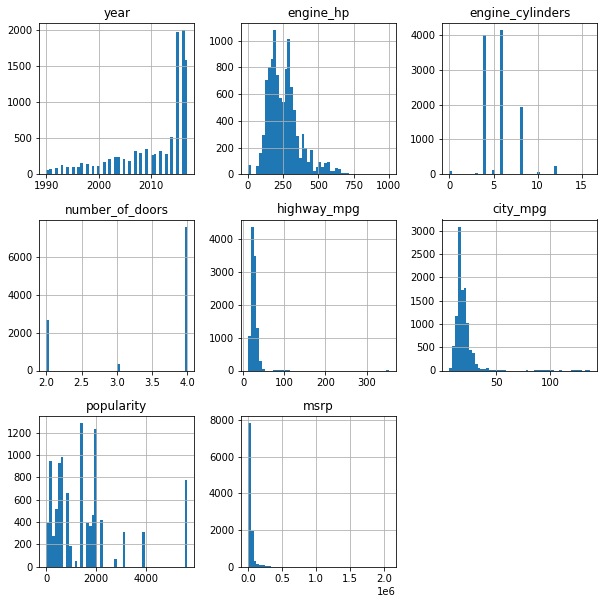

In [50]:
data.hist(bins = 50, figsize = (10,10));

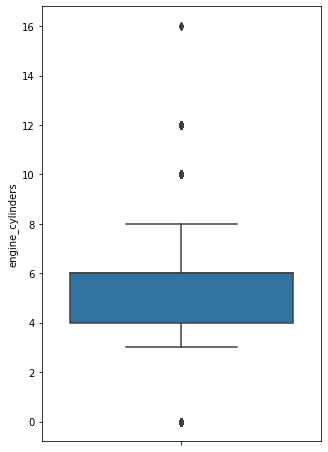

In [51]:
# Engine Cylinders
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'engine_cylinders');

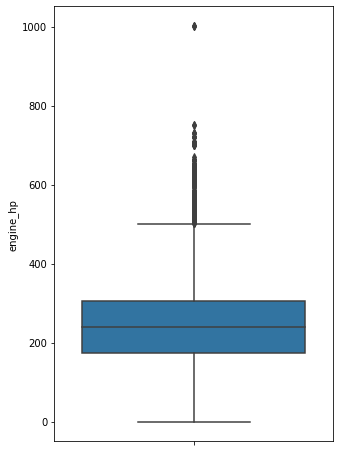

In [52]:
# Engine HP
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'engine_hp');

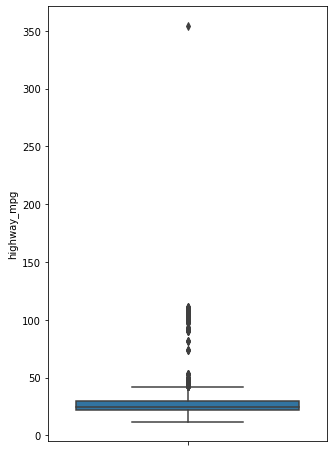

In [53]:
# Highway MPG
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'highway_mpg');

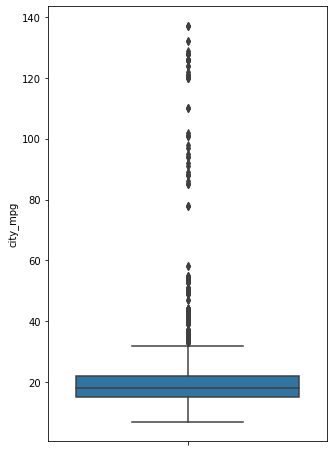

In [54]:
# City mpg
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'city_mpg');

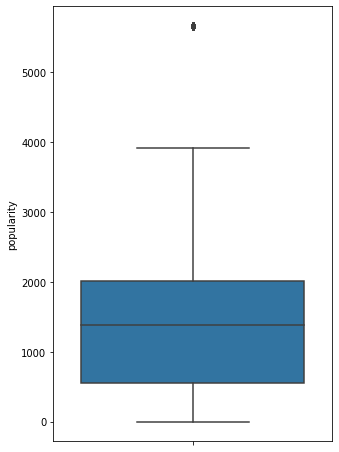

In [55]:
# Popularity

plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'popularity');

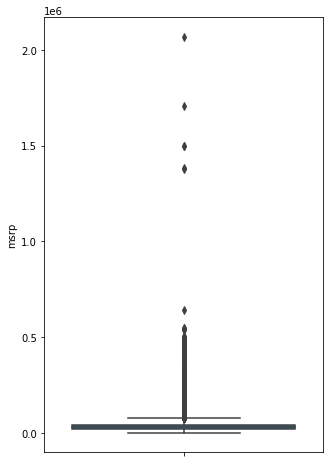

In [56]:
# MSRP
plt.figure(figsize = (5,8))
sns.boxplot(data = data, y = 'msrp');

In [57]:
# Copying data, so we can clean outliers safely.
data_out = data.copy()

In [58]:
# Reference: https://www.kaggle.com/devson/beginnersguidetoeda-prediction
def removingoutliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    
    df_no_outlier = dataframe[(dataframe[column] > min ) & (dataframe[column] < max)]
        
    return df_no_outlier

[[Reference]](#BeginnersGuidetoEDA+Prediction---DEVSON)

In [59]:
# Removing Outlier for MSRP
data_out = removingoutliers(data_out, "msrp")

In [60]:
# Removing Outlier for popularity
data_out = removingoutliers(data_out, "popularity")

In [61]:
# Removing Outlier for city_mpg
data_out = removingoutliers(data_out, "city_mpg")

In [62]:
# Removing Outlier for highway_mpg
data_out = removingoutliers(data_out, "highway_mpg")

In [63]:
# Removing Outlier for engine_hp
data_out = removingoutliers(data_out, "engine_hp")

In [64]:
# Removing Outlier for engine_cylinders
data_out = removingoutliers(data_out, "engine_cylinders")

In [65]:
data_out.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000
mean,2010.507284,235.355505,5.439814,3.540005,26.224266,19.107953,1205.359326,30419.427275
std,7.231041,79.092849,1.395561,0.827690,5.383455,4.119591,876.403787,16159.266772
min,1990.000000,0.000000,3.000000,2.000000,13.000000,10.000000,21.000000,2000.000000
25%,2007.000000,171.000000,4.000000,4.000000,23.000000,16.000000,481.000000,21034.750000
50%,2015.000000,232.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,29900.000000
75%,2016.000000,292.000000,6.000000,4.000000,30.000000,22.000000,1851.000000,40250.000000
max,2017.000000,469.000000,8.000000,4.000000,40.000000,30.000000,3916.000000,76400.000000


_This is looking good._

#### Data Visualization

_We already have some knowledge of our data._

_To gain more insights from our it, and check relationships between the features we will use the Data Visualization technique._

In [66]:
data_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8374 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               8374 non-null   object 
 1   model              8374 non-null   object 
 2   year               8374 non-null   int64  
 3   engine_fuel_type   8374 non-null   object 
 4   engine_hp          8374 non-null   float64
 5   engine_cylinders   8374 non-null   float64
 6   transmission_type  8374 non-null   object 
 7   driven_wheels      8374 non-null   object 
 8   number_of_doors    8374 non-null   float64
 9   vehicle_size       8374 non-null   object 
 10  vehicle_style      8374 non-null   object 
 11  highway_mpg        8374 non-null   int64  
 12  city_mpg           8374 non-null   int64  
 13  popularity         8374 non-null   int64  
 14  msrp               8374 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.0+ MB


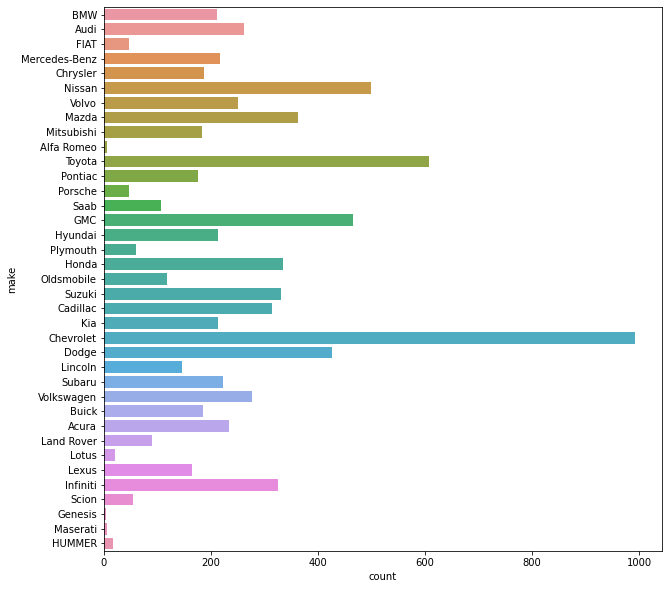

In [73]:
plt.figure(figsize = (10,10))
sns.countplot(data = data_out, y = "make");

- Chevrolet
- Volkswagen
- Toyota
- Nissan

_These cars has largest population, obviously they are widely used brands with average price all over the world. Premium or Luxurious cars are less populated._

- HUMMER
- Maserati
- Alfa Romeo

_Let's observe the same figure with price._

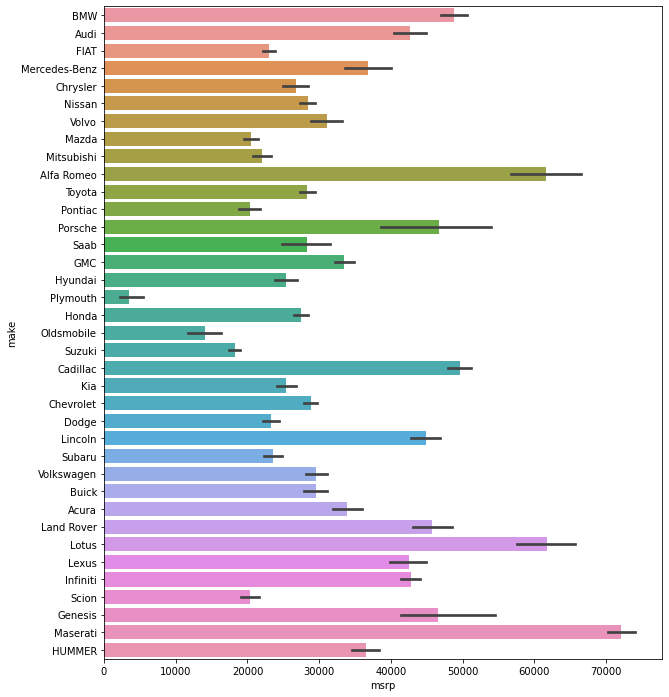

In [72]:
plt.figure(figsize = (10,12))
sns.barplot(data = data_out, y = "make", x = "msrp");

_We can clearly see that `Maserati`, `HUMMER`, `Land Rover` and `Alfa Romeo` are among the expensive cars._

_Let's check the car models._

In [74]:
data_out["model"].value_counts()

Silverado 1500         156
Tundra                 118
Sierra 1500             90
Frontier                76
Accord                  73
                      ... 
Yaris iA                 1
7 Series                 1
Eighty-Eight Royale      1
Metro                    1
G3                       1
Name: model, Length: 688, dtype: int64

_There are 688 unique models. This features is useless for visualization, as single brand consist of multiple models._

_Let's see `engine_fuel_type`._

---

---

---

## Appendix A<a id="AppendixA"></a>

### Glossary

- MSRP - manufacturer’s suggested retail price
- EDA - exploratory data analysis

---

## References <a id="ReferencesSection"></a>

### kaggle.com
<https://www.kaggle.com/CooperUnion/cardataset>

### kaggle - Car Features and MSRP
<https://www.kaggle.com/CooperUnion/cardataset>

### kaggle - Car Features and MSRP code
<https://www.kaggle.com/CooperUnion/cardataset/code>

---

### Car Features and Price Prediction - VAISHNAVI.KHILARI
<https://www.kaggle.com/vaishnavikhilari/car-features-and-price-prediction>

### BeginnersGuidetoEDA+Prediction - DEVSON
<https://www.kaggle.com/devson/beginnersguidetoeda-prediction>

### linear reggresion - SAICHARAN REDDY
<https://www.kaggle.com/sai2119/linear-reggresion>

### Simple and quick EDA - BRYANB
<https://www.kaggle.com/bryanb/simple-and-quick-eda>

### XGBoost explainability with SHAP - BRYANB
<https://www.kaggle.com/bryanb/xgboost-explainability-with-shap>

### UsedCarPricePrediction - ANIRBANK
<https://www.kaggle.com/anirbank/usedcarpriceprediction>

### Car Price Prediction - JEFFREY SHIH 
<https://www.kaggle.com/jshih7/car-price-prediction>

### Car Retail Price Prediction - GABRIEL ATKIN
<https://www.kaggle.com/gcdatkin/car-retail-price-prediction>

### MSRP Prediction - PHAN NGUYEN
<https://www.kaggle.com/heolinhdam/msrp-prediction>

### Car Price Prediction - OMAR22
<https://www.kaggle.com/omar22/car-price-prediction>

### Car Price Pridiction - NIKHIL SHRESTHA
<https://www.kaggle.com/snikhil17/car-price-pridiction>

### EDA on Car Price Pridiction - NIKHIL SHRESTHA
<https://www.kaggle.com/snikhil17/eda-on-car-price-pridiction>

---

### Dynamic Pricing Explained: Machine Learning in Revenue Management and Pricing Optimization
<https://www.altexsoft.com/blog/datascience/dynamic-pricing-explained-use-in-revenue-management-and-pricing-optimization/>

### Argonne’s machine learning model estimates technology contributions towards MSRP
<https://www.anl.gov/es/article/argonnes-machine-learning-model-estimates-technology-contributions-towards-msrp>

### How Machine Learning is reshaping Price Optimization
<https://tryolabs.com/blog/price-optimization-machine-learning/>

---

### Don't repeat yourself
<https://en.wikipedia.org/wiki/Don%27t_repeat_yourself>

### Pandas Fillna Mode
<https://stackoverflow.com/questions/42789324/pandas-fillna-mode>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>

### 
<>


---

### Pinterest - 300TD wheel base? - 1
<https://www.pinterest.com/pin/321022279665496029/>

### Pinterest - 300TD wheel base? - 2
<https://i.pinimg.com/originals/1a/f8/8c/1af88cc04b0735e2151db4f2a4a94d4d.jpg>

### Austin Powers - Live dangerously meme 1
<https://i.kym-cdn.com/photos/images/newsfeed/000/511/991/3a5.jpg>

### 
<>

### 
<>

### 
<>

---